**Part 1.1**: In this part you will implement variation of Dijkstra’s algorithm. It is a popular shortest path algorithm where the current known shortest path to each node is updated once new path is identified. This updating is called relaxing and in a graph with 𝑛 nodes it can occur at most 𝑛 − 1 times. In this part implement a function dijkstra (graph, source, k) which takes the graph and source as an input and where
each node can be relaxed on only k times where, 0 < 𝑘 < 𝑁 − 1. This function returns a distance and path dictionary which maps a node (which is an integer) to the distance and the path (sequence of nodes).

In [32]:
import random
import matplotlib.pyplot as plt
import time
import sys
import psutil
import timeit

In [2]:
# weighted digraph 
class DWG:

    def __init__(self):
        self.adj = {}
        self.weights = {}

    def are_connected(self, node1, node2):
        for neighbour in self.adj[node1]:
            if neighbour == node2:
                return True
        return False

    def adjacent_nodes(self, node):
        return self.adj[node]

    def add_node(self, node):
        self.adj[node] = []

    def add_edge(self, node1, node2, weight):
        if node2 not in self.adj[node1]:
            self.adj[node1].append(node2)
        self.weights[(node1, node2)] = weight

    def w(self, node1, node2):
        if self.are_connected(node1, node2):
            return self.weights[(node1, node2)]

    def num_nodes(self):
        return len(self.adj)

In [3]:
# min pq necessary for djisktra's 
class Item:
    def __init__(self, value, key):
        self.value = value
        self.key = key

class MinHeap:
    def __init__(self, elements):
        self.heap = elements
        self.positions = {element.value: i for i, element in enumerate(elements)}
        self.size = len(elements)
        self.build_heap()

    def parent(self, i):
        return (i - 1) // 2

    def left(self, i):
        return 2 * i + 1

    def right(self, i):
        return 2 * i + 2

    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        self.positions[self.heap[i].value], self.positions[self.heap[j].value] = i, j

    def min_heapify(self, i):
        l = self.left(i)
        r = self.right(i)
        smallest = i
        if l < self.size and self.heap[l].key < self.heap[i].key:
            smallest = l
        if r < self.size and self.heap[r].key < self.heap[smallest].key:
            smallest = r
        if smallest != i:
            self.swap(i, smallest)
            self.min_heapify(smallest)

    def build_heap(self):
        for i in range(self.size // 2, -1, -1):
            self.min_heapify(i)

    def extract_min(self):
        min_element = self.heap[0]
        self.size -= 1
        self.heap[0] = self.heap[self.size]
        self.positions[self.heap[0].value] = 0
        self.heap.pop()
        self.min_heapify(0)
        return min_element

    def decrease_key(self, value, new_key):
        i = self.positions[value]
        if new_key < self.heap[i].key:
            self.heap[i].key = new_key
            while i > 0 and self.heap[self.parent(i)].key > self.heap[i].key:
                self.swap(i, self.parent(i))
                i = self.parent(i)

    def insert(self, element):
        self.size += 1
        self.heap.append(element)
        self.positions[element.value] = self.size - 1
        self.decrease_key(element.value, element.key)

    def is_empty(self):
        return self.size == 0

In [4]:
def dijkstra(g, source, k):
    paths = {source: [source]} 
    dist = {} 
    nodes = list(g.adj.keys())
    relax_count = {} 
        
    Q = MinHeap([])
    
    for i in g.adj.keys(): 
        relax_count[i] = 0 
        
    for node in nodes:
        Q.insert(Item(node, float("inf")))
        dist[node] = float("inf")
        
    Q.decrease_key(source, 0)
    
    while not Q.is_empty(): 
        current_element = Q.extract_min() 
        current_node = current_element.value
        dist[current_node] = current_element.key 
        for neighbour in g.adj[current_node]:
            if dist[current_node] + g.w(current_node, neighbour) < dist[neighbour] and relax_count[neighbour] < k:
                Q.decrease_key(neighbour, dist[current_node] + g.w(current_node, neighbour))
                dist[neighbour] = dist[current_node] + g.w(current_node, neighbour)
                paths[neighbour] = paths.get(current_node, []) + [neighbour]
                relax_count[neighbour] += 1 
                
    return dist, relax_count, paths

In [5]:
g = DWG() 
g.add_node(0)
g.add_node(1)
g.add_node(2)
g.add_node(3) 
g.add_edge(0, 1, 4)
g.add_edge(0, 2, 3)
g.add_edge(1, 2, 1)
g.add_edge(1, 3, 2)
g.add_edge(2, 3, 5)

In [6]:
source_node = 0
k = 2 # Relax each nodes k = 2 times
distances, relax_count, paths = dijkstra(g, source_node, k)
print(distances)
print(relax_count)
print(paths) 

{0: 0, 1: 4, 2: 3, 3: 6}
{0: 0, 1: 1, 2: 1, 3: 2}
{0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 1, 3]}


**Part 1.2**: Consider the same restriction as previous and implement a variation of Bellman Ford’s algorithm. This means implement a function bellman_ford(graph, source, k) which take the graph and source as an input and finds the path where each node can be relaxed only k times, where, 0 < 𝑘 < 𝑁 − 1. This function also returns a distance and path dictionary which maps a node (which is an integer) to the distance and the path (sequence of nodes).

In [7]:
def bf(g, source, k): 
    paths = {source: [source]} 
    dist = {} 
    nodes = list(g.adj.keys())
    relax_count = {} 
    
    for i in g.adj.keys(): 
        relax_count[i] = 0 
    
    for node in nodes: 
        dist[node] = float("inf")
        
    dist[source] = 0 
    
    for _ in range(g.num_nodes() - 1):
        for node in nodes: 
            for neighbour in g.adj[node]: 
                if relax_count[neighbour] < k and dist[neighbour] > dist[node] + g.w(node,neighbour):
                    dist[neighbour] = dist[node] + g.w(node,neighbour) 
                    paths[neighbour] = paths.get(node, []) + [neighbour]
                    relax_count[neighbour] += 1
                    
    """"
    if a node's distance can still be improved after the main algorithm has completed, 
    it means there is a path of decreasing costs, indicating a cycle with negative 
    total cost
    """
    
    for node in nodes:
        for neighbour in g.adj[node]:
            if relax_count[neighbour] < k and dist[neighbour] > dist[node] + g.w(node, neighbour):
                # negative cycle detected, return infinity
                return float('inf'), relax_count, paths
                                        
    return dist, relax_count, paths

In [8]:
g1 = DWG() 
g1.add_node(0)
g1.add_node(1)
g1.add_node(2)
g1.add_node(3) 
g1.add_edge(0, 1, 4)
g1.add_edge(0, 2, 3)
g1.add_edge(1, 2, 1)
g1.add_edge(1, 3, 2)
g1.add_edge(2, 3, 5)

source_node = 0
k = 1  # Relax each nodes k = 1 times
distances, relax_count, paths = bf(g1, source_node, k)
print(distances)
print(paths) 
print(relax_count)

{0: 0, 1: 4, 2: 3, 3: 6}
{0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 1, 3]}
{0: 0, 1: 1, 2: 1, 3: 1}


In [9]:
# handle negative cycles, return infinity
g = DWG()

# Add nodes
for i in range(4):
    g.add_node(i)

# Add edges with weights
g.add_edge(0, 1, 1)
g.add_edge(1, 2, -10)
g.add_edge(2, 0, 2)

source = 0
k = 4

print("Test case graph:")
print("0 --(1)--> 1 --(-3)--> 2 --(2)--> 0")

# Run the algorithm
dist, relax_count, paths = bf(g, source, k)
print("\nResult:")
if dist == float('inf'):
    print("Negative cycle detected")
else:
    print("Shortest distances from source:")
    print(dist)
    print("Relax count:")
    print(relax_count)
    print("Shortest paths:")
    print(paths)

Test case graph:
0 --(1)--> 1 --(-3)--> 2 --(2)--> 0

Result:
Negative cycle detected


**Part 1.3**: Design an experiment to analyze the performance of functions written in Part 1.1 and 1.2. You should consider factors like graph size, graph density and value of k, that impact the algorithm performance in terms of its accuracy, time and space complexity.

The first experiment will examine how many relaxations per node (k values) are needed to acquire a shortest path for both algorithms for both a graph. By comparing the number of relaxations per node for Dijkstra's and Bellman-Ford's variations, we can assess which algorithm performs better in terms of efficiency. We do this by measuring the **average** increase ratio; specifically, the increase ratio for each node represents the ratio between the distance computed by the algorithm and the actual shortest distance between two nodes in the graph. An increase ratio closer to 1.0  indicates that the algorithm produces paths closer to the actual shortest path, while a higher increase ratio suggests that the algorithm's paths deviate further from the true shortest path. Furthermore, an algorithm which converges to 1 faster as we increase the k value (i.e. max number of relaxations/node) is a more efficient algorithm in finding the shortest path.

First, we will create a function to find the shortest path of a large graph without relaxation limits (i.e. using Dijkstra's algorithm with no relaxation limits). Then, we run the experiment with a graph that has 80 nodes, n(n-1) edges for full graph density for a weighted digraph. We increase the max number of relaxations per node (k) for both algorithms until the average increase ratio for both algorithms converge to 1 (i.e., both algorithms have achieved the true shortest path). 

Our results show that Dijkstra's tends to have an increase ratio closer to 1.0 per iteration, showing it produces paths closer to the actual shortest path calculated per iteration. Furthermore, overall, Dijkstra's is more efficient in finding the true shortest path, converging to 1 with a lesser number of relaxations per node (k). 

In [62]:
def dijkstra_nolimit(g, source):
    paths = {source: [source]} 
    dist = {} 
    nodes = list(g.adj.keys())
    relax_count = {} 
        
    Q = MinHeap([])
    
    for i in g.adj.keys(): 
        relax_count[i] = 0 
        
    for node in nodes:
        Q.insert(Item(node, float("inf")))
        dist[node] = float("inf")
        
    Q.decrease_key(source, 0)
    
    while not Q.is_empty(): 
        current_element = Q.extract_min() 
        current_node = current_element.value
        dist[current_node] = current_element.key 
        for neighbour in g.adj[current_node]:
            if dist[current_node] + g.w(current_node, neighbour) < dist[neighbour]:
                Q.decrease_key(neighbour, dist[current_node] + g.w(current_node, neighbour))
                dist[neighbour] = dist[current_node] + g.w(current_node, neighbour)
                paths[neighbour] = paths.get(current_node, []) + [neighbour]
                
    return dist

In [11]:
def generate_graph(graph, nodes, edges, max_weight): 
    added_nodes = set() # set to store (unique) added nodes 
    
    for _ in range(nodes): 
        node = len(added_nodes) # Generate nodes starting from 0 
        graph.add_node(node) 
        added_nodes.add(node) 
    
    for _ in range(edges): 
        source = random.randint(0, nodes - 1)
        target = random.randint(0, nodes - 1)
        weight = random.randint(1, max_weight) # assume positive weights (for simplicity) 
        if source != target and not graph.are_connected(source, target): 
            graph.add_edge(source, target, weight) 

In [80]:
def run_experiment(graph_size, source_node, max_weight): 
    increase_ratios_dijkstra = [] # store increase factors for dijkstra 
    increase_ratios_bf = [] 
    k_values = [] 
    
    g = DWG() 
    
    num_edges = graph_size * (graph_size - 1) # completely connected digraph 
    generate_graph(g, graph_size, num_edges, max_weight)
            
    # generate random graph (v,e) with v nodes and e edges
    g = DWG()
    generate_graph(g, graph_size, num_edges, max_weight)
        
    # calculate actual shortest path distance (without relaxation limits)
    actual_shortest_distances = dijkstra_nolimit(g, source_node)
        
    # vary relaxation limits 
    
    k = 1 
    
    while True: 
        # find Dijkstra increase ratio 
        dist_dijkstra, _, _ = dijkstra(g, source_node, k)
        dijkstra_increase_ratios = {node: dist_dijkstra[node] / actual_shortest_distances[node] for node in g.adj.keys() if actual_shortest_distances[node] != 0}
        increase_ratios_dijkstra.append(sum(dijkstra_increase_ratios.values()) / len(dijkstra_increase_ratios)) 
            
        # find Bellman-Ford increase ratios 
        dist_bf, _, _ = bf(g, source_node, k) 
        bf_increase_ratios = {node: dist_bf[node] / actual_shortest_distances[node] for node in g.adj.keys() if actual_shortest_distances[node] != 0}
        increase_ratios_bf.append(sum(bf_increase_ratios.values()) / len(bf_increase_ratios))
            
        # record value of k 
        k_values.append(k) 
        
        # if reached shortest for both algorithms, stop 
        if all(dist_dijkstra[node] == actual_shortest_distances[node] for node in g.adj.keys()) and \
                all(dist_bf[node] == actual_shortest_distances[node] for node in g.adj.keys()):
            break
            
        # otherwise, increase k (number of relaxations) for next iteration
        k += 1
    
    return k_values, increase_ratios_dijkstra, increase_ratios_bf 

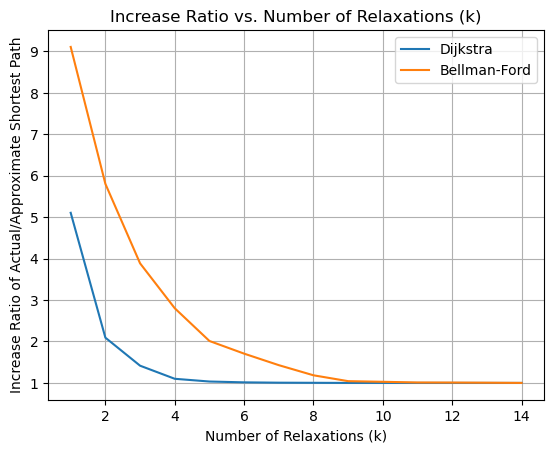

In [81]:
graph_size = 80 
source_node = 0 
max_weight = 50 

k_values, increase_ratios_dijkstra, increase_ratios_bf = run_experiment(graph_size, source_node, max_weight)

# Plot the results
plt.plot(k_values, increase_ratios_dijkstra, label="Dijkstra")
plt.plot(k_values, increase_ratios_bf, label="Bellman-Ford")
plt.xlabel("Number of Relaxations (k)")
plt.ylabel("Increase Ratio of Approximate/Actual Shortest Path")
plt.title("Increase Ratio vs. Number of Relaxations (k)")
plt.legend()
plt.grid(True)
plt.show()

The second experiment will measure the time complexity of Dijkstra and Bellman-Ford's algorithms. The relaxation limit to infinity for both algorithms; essentially, they have no relaxation limit. In addition, the experiment will iterate over a list of increasing node sizes, starting from 10 nodes to 300, with a proportional number of edges on each run for a full density graph, i.e. n(n-1) edges. 

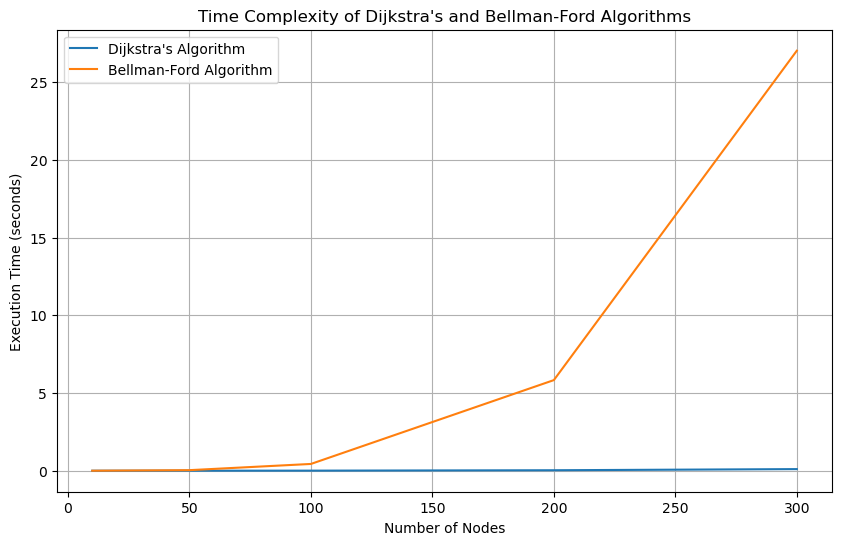

In [18]:
def measure_time_complexity(algorithm, nodes_list, max_weight, num_runs):
    results = []
    for nodes in node_sizes:
        edges = nodes * (nodes - 1)  
        execution_times = []
        graph = DWG()
        generate_graph(graph, nodes, edges, max_weight)
        for _ in range(num_runs):
            source_node = 0
            start_time = time.time()
            algorithm(graph, source_node, k)
            execution_time = time.time() - start_time
            execution_times.append(execution_time)
        average_execution_time = sum(execution_times) / num_runs
        results.append((nodes, average_execution_time))
    return results

node_sizes = [10, 50, 100, 200, 300] 
max_weight = 10 # max weight for edges
num_runs = 3 # number of runs for each size 
k = float('inf') # infinite relaxation steps 

dijkstra_results = measure_time_complexity(dijkstra, node_sizes, max_weight, num_runs)
bf_results = measure_time_complexity(bf, node_sizes, max_weight, num_runs)
# Plot results
plt.figure(figsize=(10, 6))
plt.title("Time Complexity of Dijkstra's and Bellman-Ford Algorithms")
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (seconds)")

x = [result[0] for result in dijkstra_results]  # Number of nodes
y_dijkstra = [result[1] for result in dijkstra_results]  # Execution time for Dijkstra's algorithm
y_bellman_ford = [result[1] for result in bf_results]  # Execution time for Bellman-Ford algorithm

plt.plot(x, y_dijkstra, label="Dijkstra's Algorithm")
plt.plot(x, y_bellman_ford, label="Bellman-Ford Algorithm")

plt.legend()
plt.grid(True)
plt.show()

As we can observe, Dijkstra's algorithm is better when it comes to reducing the time complexity as the number of nodes increases. 

The third experiment compares the space complexity of Dijkstra and Bellman Ford algorithms. The graph sizes range from 10 to 500 nodes, with steps of 10. For each graph size, random graphs are generated with a number of edges proportional to the size of the graph. Both algorithms are then applied to each generated graph, with a relaxation limit k set to infinity; i.e., no relaxation limit to achieve the shortest path. The space complexities of both algorithms are measured by considering the memory consumption of various data structures used during their execution, including dictionaries, lists, and priority queues. 

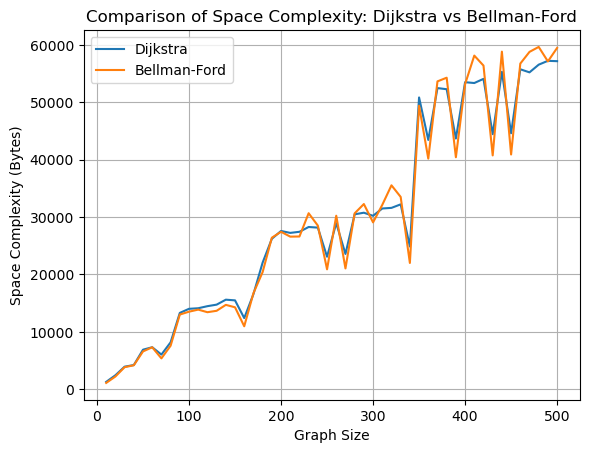

In [39]:
def space_complexity_dijkstra(graph, source, k):
    paths = {source: [source]} 
    dist = {} 
    nodes = list(graph.adj.keys())
    relax_count = {} 
        
    Q = MinHeap([])
    
    for i in graph.adj.keys(): 
        relax_count[i] = 0 
        
    for node in nodes:
        Q.insert(Item(node, float("inf")))
        dist[node] = float("inf")
        
    Q.decrease_key(source, 0)
    
    space_used = sys.getsizeof(paths) + sys.getsizeof(dist) + sys.getsizeof(nodes) + sys.getsizeof(relax_count) + sys.getsizeof(Q.heap)
    
    while not Q.is_empty(): 
        current_element = Q.extract_min() 
        current_node = current_element.value
        dist[current_node] = current_element.key 
        for neighbour in graph.adj[current_node]:
            if dist[current_node] + graph.w(current_node, neighbour) < dist[neighbour] and relax_count[neighbour] < k:
                Q.decrease_key(neighbour, dist[current_node] + graph.w(current_node, neighbour))
                dist[neighbour] = dist[current_node] + graph.w(current_node, neighbour)
                paths[neighbour] = paths.get(current_node, []) + [neighbour]
                relax_count[neighbour] += 1 
                space_used += sys.getsizeof(neighbour)
                
    return space_used


def space_complexity_bellman_ford(graph, source, k):
    paths = {source: [source]} 
    dist = {} 
    nodes = list(graph.adj.keys())
    relax_count = {} 
    
    for i in graph.adj.keys(): 
        relax_count[i] = 0 
    
    for node in nodes: 
        dist[node] = float("inf")
        
    dist[source] = 0 
    
    space_used = sys.getsizeof(paths) + sys.getsizeof(dist) + sys.getsizeof(nodes) + sys.getsizeof(relax_count)
    
    for _ in range(graph.num_nodes() - 1):
        for node in nodes: 
            for neighbour in graph.adj[node]: 
                if relax_count[neighbour] < k and dist[neighbour] > dist[node] + graph.w(node,neighbour):
                    dist[neighbour] = dist[node] + graph.w(node,neighbour) 
                    paths[neighbour] = paths.get(node, []) + [neighbour]
                    relax_count[neighbour] += 1
                    space_used += sys.getsizeof(neighbour)
                    
    for node in nodes:
        for neighbour in graph.adj[node]:
            if relax_count[neighbour] < k and dist[neighbour] > dist[node] + graph.w(node, neighbour):
                return float('inf')  # negative cycle detected, return infinity
                                        
    return space_used

def average_space_complexity_dijkstra(graph, source, k, iterations):
    total_space = 0
    for _ in range(iterations):
        space_used = space_complexity_dijkstra(graph, source, k)
        total_space += space_used
    return total_space / iterations

def average_space_complexity_bellman_ford(graph, source, k, iterations):
    total_space = 0
    for _ in range(iterations):
        space_used = space_complexity_bellman_ford(graph, source, k)
        total_space += space_used
    return total_space / iterations

graph_sizes = list(range(10, 501, 10))  
k = float('inf') 
iterations = 3 

dijkstra_space_complexities = []
bellman_ford_space_complexities = []

for size in graph_sizes:
    graph = DWG()
    generate_graph(graph, size, size*2, 10)  # Generate a random graph
    source_node = random.randint(0, graph.num_nodes() - 1)
    
    dijkstra_space = average_space_complexity_dijkstra(graph, source_node, k, iterations)
    bellman_ford_space = average_space_complexity_bellman_ford(graph, source_node, k, iterations)
    
    dijkstra_space_complexities.append(dijkstra_space)
    bellman_ford_space_complexities.append(bellman_ford_space)

plt.plot(graph_sizes, dijkstra_space_complexities, label="Dijkstra")
plt.plot(graph_sizes, bellman_ford_space_complexities, label="Bellman-Ford")
plt.xlabel('Graph Size')
plt.ylabel('Space Complexity (Bytes)')
plt.title('Comparison of Space Complexity: Dijkstra vs Bellman-Ford')
plt.legend()
plt.grid(True)
plt.show()


Results show that the space complexities for both algorithms have negligible difference, i.e. they have similar space complexities. This lines up with theoretical expectations wherein the space complexity for Dijkstra's and Bellman Ford are both O(e), with e being the number of edges. Although not following a linear pattern, they line up with theoretical expectations in the way that they both have similar time complexities. A potential reason for this deviation from a linear pattern is that both algorithms require auxiliary data structures to store intermediate results and manage algorithmic operations. These data structures, such as dictionaries for storing distances and paths, may contribute to the overall space complexity. The utilization of these data structures in the algorithm can affect the memory usage and hence the practical, observed space complexities.